In [1]:
# Setup the library
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import numpy as np
import math

top_level=f'{os.getcwd()}/../'
pr.addLibraryPath( f'{top_level}/scripts' )
import setupLibPaths
import epix_hr_single_10k
import ePixViewer.Cameras as cameras


In [2]:
filename = '/u1/ddoering/data/ePix-hr-10k-v3-LCLSIITiming/timingheader.dat'

In [3]:
from importlib import reload
reload(cameras)

MAX_NUMBER_OF_FRAMES_PER_BATCH  = 100
cameraType            = 'ePixHr10kTBatcher'
bitMask               = 0xffff
currentCam = cameras.Camera(cameraType = cameraType)
currentCam.bitMask = bitMask
currentCam.MAX_NUMBER_OF_FRAMES_PER_BATCH  = MAX_NUMBER_OF_FRAMES_PER_BATCH


Camera  ePixHr10kTBatcher  selected.


In [4]:
MAX_NUMBER_OF_FRAMES_PER_BATCH  = 1000
cameraType            = 'ePixHr10kTBatcher'
bitMask               = 0xffff

def getData(localFile, batchertimingWidth = 0):

    file_header = [0]
    numberOfFrames = 0
    previousSize = 0
    while ((len(file_header)>0) and ((numberOfFrames<MAX_NUMBER_OF_FRAMES_PER_BATCH) or (MAX_NUMBER_OF_FRAMES_PER_BATCH==-1))):
        try:
            # reads file header [the number of bytes to read, EVIO]
            file_header = np.fromfile(localFile, dtype='uint32', count=2)            
            payloadSize = int(file_header[0]/1)-(4) #-1 is need because size info includes the second word from the header            
            newPayload = np.fromfile(f, dtype='uint8', count=payloadSize) #(frame size splited by four to read 32 bit 
            #save only serial data frames
            if (numberOfFrames == 0):
                print(file_header)
                allFrames = [newPayload.copy()]
            else:
                newFrame  = [newPayload.copy()]
                allFrames = np.append(allFrames, newFrame, axis = 0)
            numberOfFrames = numberOfFrames + 1 
            #print ("Payload" , numberOfFrames, ":",  (newPayload[0:5]))
            previousSize = file_header
       
            if (numberOfFrames%1000==0):
                print("Read %d frames" % numberOfFrames)

        except Exception: 
            e = sys.exc_info()[0]
            #print ("Message\n", e)
            print ('\r', 'numberOfFrames read:', numberOfFrames, 'Size Error, currnt size', file_header, 'previous size', previousSize)
            

    return allFrames



In [5]:
f = open(filename, mode = 'rb')
imgDesc = []
for i in range(1):
    print("Starting to get data set %d" % (i))
    allFrames = getData(f,0)
    

numberOfFrames = allFrames.shape[0]
print(allFrames.shape)

Starting to get data set 0
[     100 16777218]
 numberOfFrames read: 131 Size Error, currnt size [] previous size [     100 16777218]
(131, 96)


In [8]:
print(allFrames[0])
print(allFrames[1])
print(allFrames[2])
print(allFrames[3])
print(allFrames[4])



[ 49 229   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 198
 122 130  37   3   0  12   0   0   0   0   0   0   0   0   5 230 155  22
 144 217  56   0   0   0   0   0   0   0   0   0   3   0   5 139 162  59
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  56   0   0   0   0   0   0   3   0   0
   0   0   0   0   0   0]
[ 49 230   0   0   0   0   0   0   0   0   0   0   0   0   0   0 235  41
 124 130  37   3   0  12   0   0   0   0   0   0   0   0 133  66 115  28
 144 217  56   0   0   0   0   0   0   0   0   0   3   0   7 143 163  59
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  56   0   0   0   0   0   0   3   0   0
   0   0   0   0   0   0]
[ 49 231   0   0   0   0   0   0   0   0   0   0   0   0   0   0  99 141
 125 130  37   3   0  12   0   0   0   0   0   0   0   0   5 159  74  34
 144 217  56   0   0   0   0   0   0   0   0   0   3   0   9 147 164  59

In [34]:
# Remove previous dataset
#if os.path.isfile(f'{top_level}/test.dat'):
#    os.remove(f'{top_level}/test.dat')    
filename = '/u1/ddoering/data/ePix-hr-10k-v3-LCLSIITiming/ASIC1_data_ASIC0_sim_plus_timing.dat'

In [13]:
from importlib import reload
reload(cameras)

MAX_NUMBER_OF_FRAMES_PER_BATCH  = 100
cameraType            = 'ePixHr10kTBatcher'
bitMask               = 0xffff
currentCam = cameras.Camera(cameraType = cameraType)
currentCam.bitMask = bitMask
currentCam.MAX_NUMBER_OF_FRAMES_PER_BATCH  = MAX_NUMBER_OF_FRAMES_PER_BATCH


Camera  ePixHr10kTBatcher  selected.


In [19]:
f = open(filename, mode = 'rb')
imgDesc = []
for i in range(2):
    print("Starting to get data set %d" % (i))
    allFrames = currentCam.getData(f,0)
    imgDesc2 = np.flip(currentCam.getDescImaData(allFrames), 0)
    if i == 0:
        headers = allFrames[:,0:6]
        imgDesc = imgDesc2
    else:
        headers = np.concatenate((headers, allFrames[:,0:6]),0)
        imgDesc = np.concatenate((imgDesc, imgDesc2),0)
    if allFrames.shape[0] != MAX_NUMBER_OF_FRAMES_PER_BATCH:
        break


numberOfFrames = allFrames.shape[0]
print(allFrames.shape)

Starting to get data set 0
numberOfFrames in the 3D array:  100
Starting descrambling images
Starting to get data set 1
numberOfFrames in the 3D array:  100
Starting descrambling images
(100, 56136)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


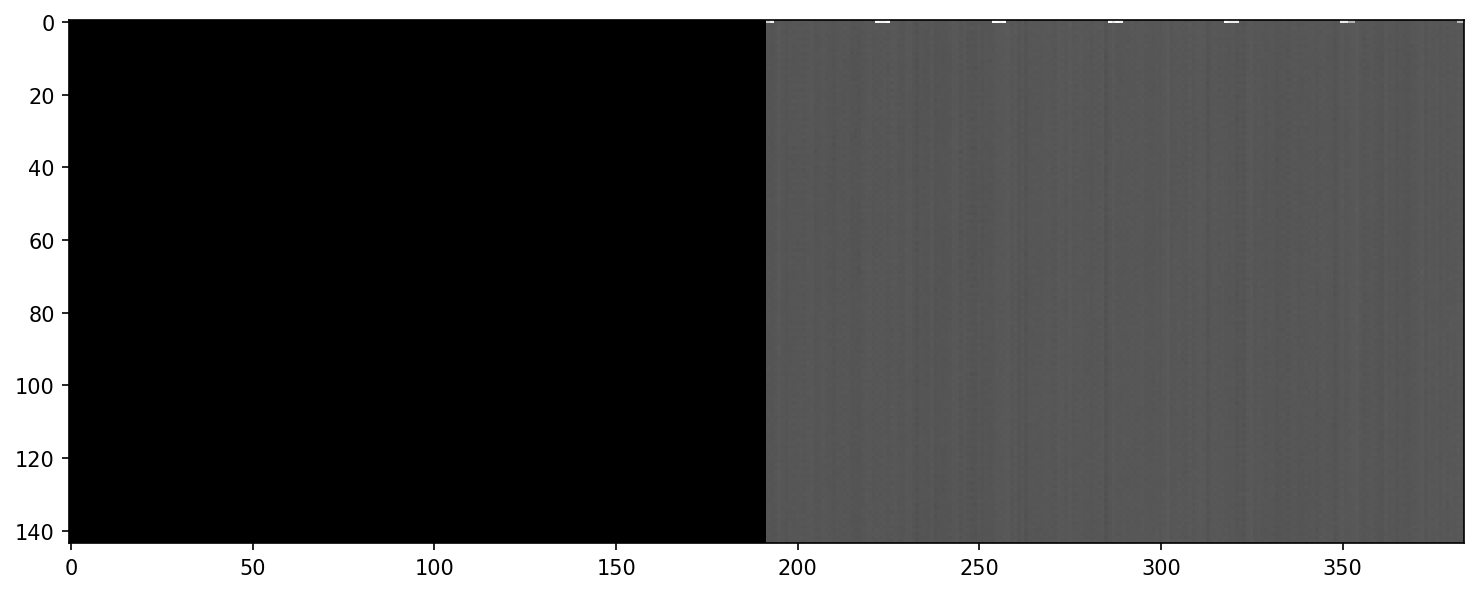

In [20]:
plt.figure(1,figsize=(12,8),dpi=150)
plt.imshow(imgDesc[100], cmap='gray')
print(imgDesc[100,100,20:40])

In [26]:
print(imgDesc[100].shape)
print(allFrames.shape)

(144, 384)
(100, 56136)


In [28]:
print(allFrames[0,0:20])
print(allFrames[1,0:20])

[13361     0     0     0     0     0     0     0 36731 20404   805  3072
     0     0     0     0  4997    20 54779    56]
[13617     0     0     0     0     0     0     0 62195 20405   805  3072
     0     0     0     0 28677  1515 54779    56]


In [9]:
filename = '/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_atest_320MHz_AHL_run2.dat'
f = open(filename, mode = 'rb')
imgDesc = []
for i in range(2):
    print("Starting to get data set %d" % (i))
    allFrames = currentCam.getData(f,8)
    imgDesc2 = np.flip(currentCam.getDescImaData(allFrames), 0)
    if i == 0:
        headers = allFrames[:,0:6]
        imgDesc = imgDesc2
    else:
        headers = np.concatenate((headers, allFrames[:,0:6]),0)
        imgDesc = np.concatenate((imgDesc, imgDesc2),0)
    if allFrames.shape[0] != MAX_NUMBER_OF_FRAMES_PER_BATCH:
        break


numberOfFrames = allFrames.shape[0]
print(allFrames.shape)

Starting to get data set 0
numberOfFrames in the 3D array:  100
Starting descrambling images
Starting to get data set 1
numberOfFrames in the 3D array:  100
Starting descrambling images
(100, 56088)


In [10]:
56128-56088

40

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
